In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
time=18+5+2/12+20/365
names=["Am-241","Ba-133","Cs-137","Co-60","Eu-152","Na-22"]
I0=[394,407,411,429,477,400]
thalbe=[432.6,10.5,30.17,5.272,13.33,2.602]
time

23.22146118721461

In [85]:
def calcINow(Io,thalbe,name,time):
    print(name)
    return Io*np.exp(-np.log(2)/thalbe*time)

In [86]:
for x in range(len(names)):
    print(calcINow(I0[x],thalbe[x],names[x],time))

Am-241
379.60968522530993
Ba-133
87.87112455001446
Cs-137
241.06985337161527
Co-60
20.25429649238714
Eu-152
142.59705294701513
Na-22
0.8232428249035494


In [87]:
data=pd.read_table("mutabelle.txt",header=None,delimiter=r"\s+")
energy=data.values[:,0]*1000
murho=data.values[:,1]
murho2=data.values[:,2]
rho = 1.848 # g / cm ^3
length = .03 # cm
def beerlambert(I0,energy,mu):
    return(I0*np.exp(-mu*rho*length))

[1.00e+00 1.50e+00 2.00e+00 3.00e+00 4.00e+00 5.00e+00 6.00e+00 8.00e+00
 1.00e+01 1.50e+01 2.00e+01 3.00e+01 4.00e+01 5.00e+01 6.00e+01 8.00e+01
 1.00e+02 1.50e+02 2.00e+02 3.00e+02 4.00e+02 5.00e+02 6.00e+02 8.00e+02
 1.00e+03 1.25e+03 1.50e+03 2.00e+03 3.00e+03 4.00e+03 5.00e+03 6.00e+03
 8.00e+03 1.00e+04 1.50e+04 2.00e+04]


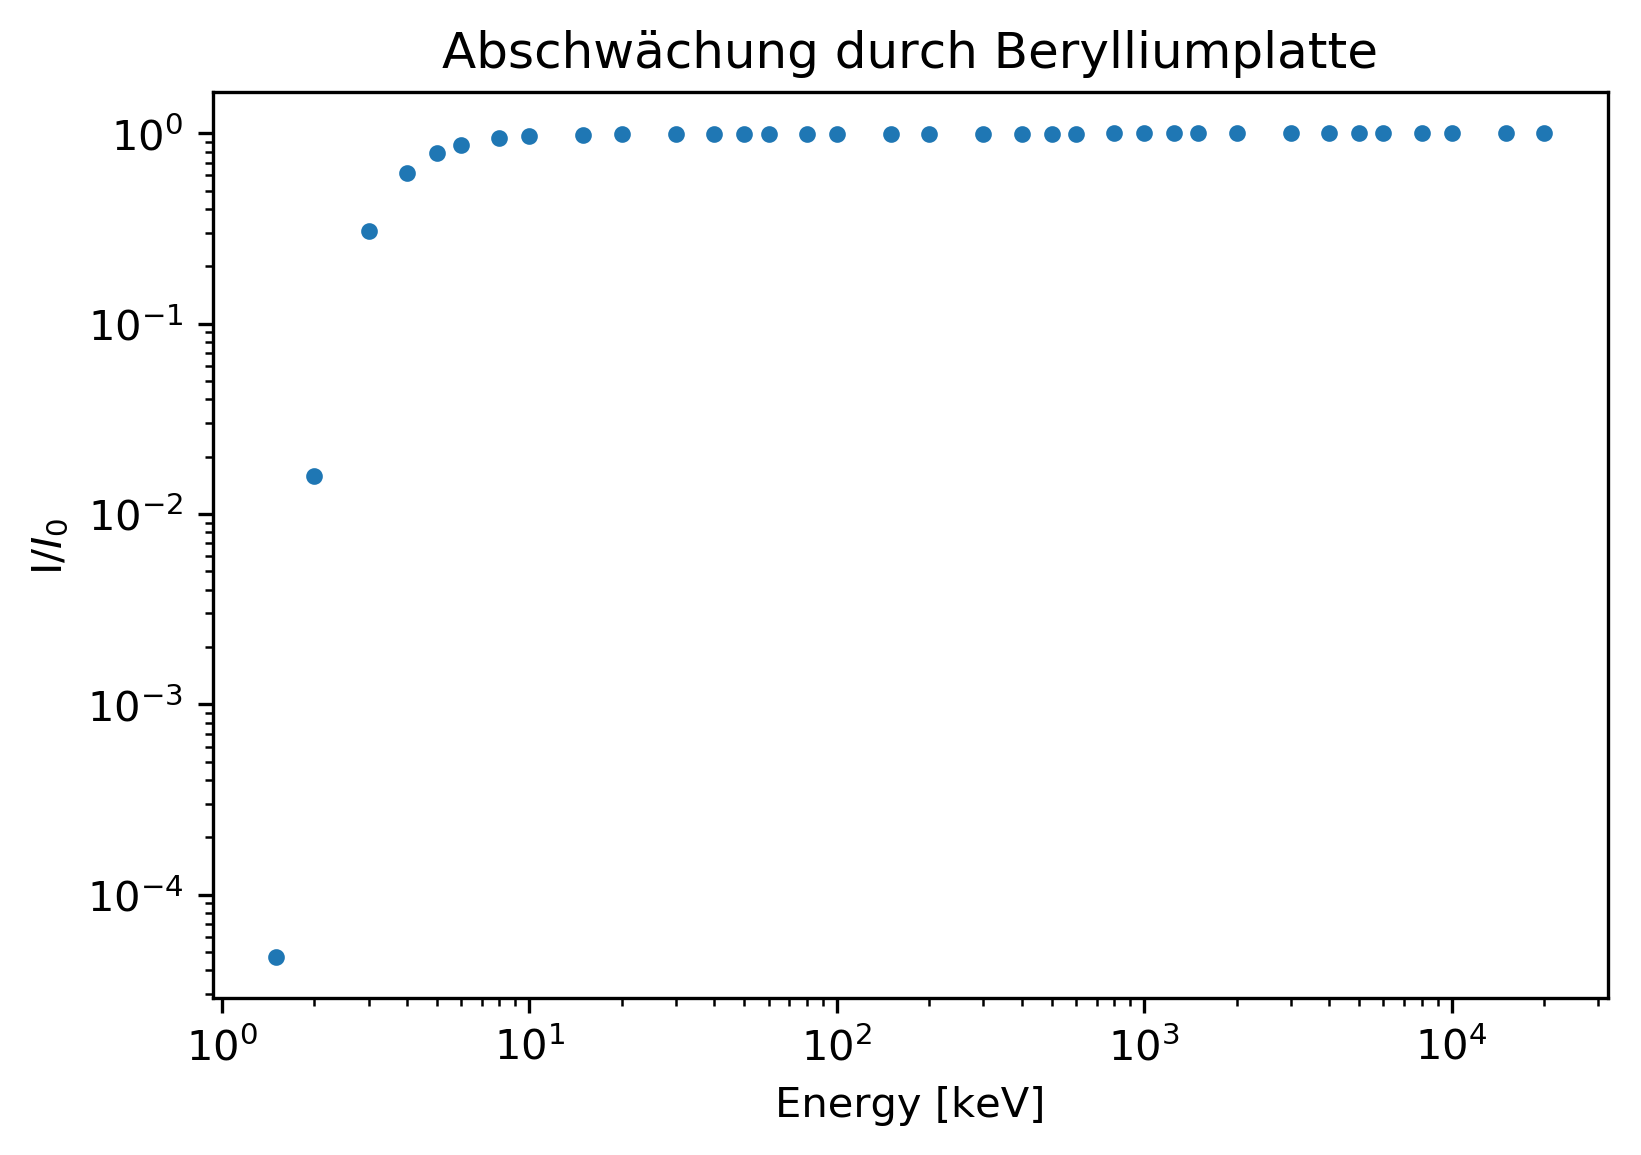

In [135]:
fig,ax=plt.subplots(dpi=300)
print(energy)
ax.plot(energy[1:],beerlambert(1,energy[1:],murho[1:]),".")
ax.loglog()
ax.set_title("Abschwächung durch Berylliumplatte")
ax.set_xlabel("Energy [keV]")
ax.set_ylabel("I/$I_0$")
fig.savefig("Plots/Abschwachung")

In [151]:
data=pd.read_table("tabelle fur effizienz.txt",header=None,delimiter=r"\s+")
data=data.values[0,:]

peaklist=[]
aktivitatslist=[]
prozentuallist=[]
absaktivitatslist=[]

for x in range(int(len(data)/7)):
        x=7*x
        peaklist.append(data[x])
        aktivitatslist.append(data[x+3])
        prozentuallist.append(data[x+4])
        absaktivitatslist.append(data[x+5])
print(peaklist)
print(aktivitatslist)
print(prozentuallist)
print(absaktivitatslist)

[477.0, 1270.0, 1160.0, 1340.0, 626.0, 78.5, 356.0, 115.0, 319.0, 1420.0, 59.6]
[4.88, 1.1, 27.5, 23.5, 438.0, 339.0, 28.8, 416.0, 161.0, 32.2, 1490.0]
[180, 100, 100, 100, 85, 36, 69, 37, 27, 22, 36]
[0.82, 0.82, 20.25, 20.25, 241.06, 87.87, 87.87, 142.59, 142.59, 142.59, 379.6]


In [152]:
korrektur=[5,10]

#aktivitatslist[5]=beerlambert(absaktivitatslist[5],60,1.401e-01)
#aktivitatslist[10]=absaktivitatslist[10]/beerlambert(1,60,1.493e-01)

print(aktivitatslist)

[4.88, 1.1, 27.5, 23.5, 438.0, 339.0, 28.8, 416.0, 161.0, 32.2, 1490.0]


In [153]:
epsilon=[]
for x in range(len(peaklist)):
    epsilon.append(aktivitatslist[x]/(absaktivitatslist[x]*1000*(prozentuallist[x]/100)))
print(aktivitatslist[6])
print(absaktivitatslist[6])
print(epsilon[6])

28.8
87.87
0.000475010019742604


[0.0033062330623306233, 0.0013414634146341464, 0.0013580246913580246, 0.0011604938271604938, 0.0021376176787814604, 0.010716588900269339, 0.000475010019742604, 0.0078850152487855, 0.0041818942162584775, 0.0010264649439907173, 0.010903290012879053]


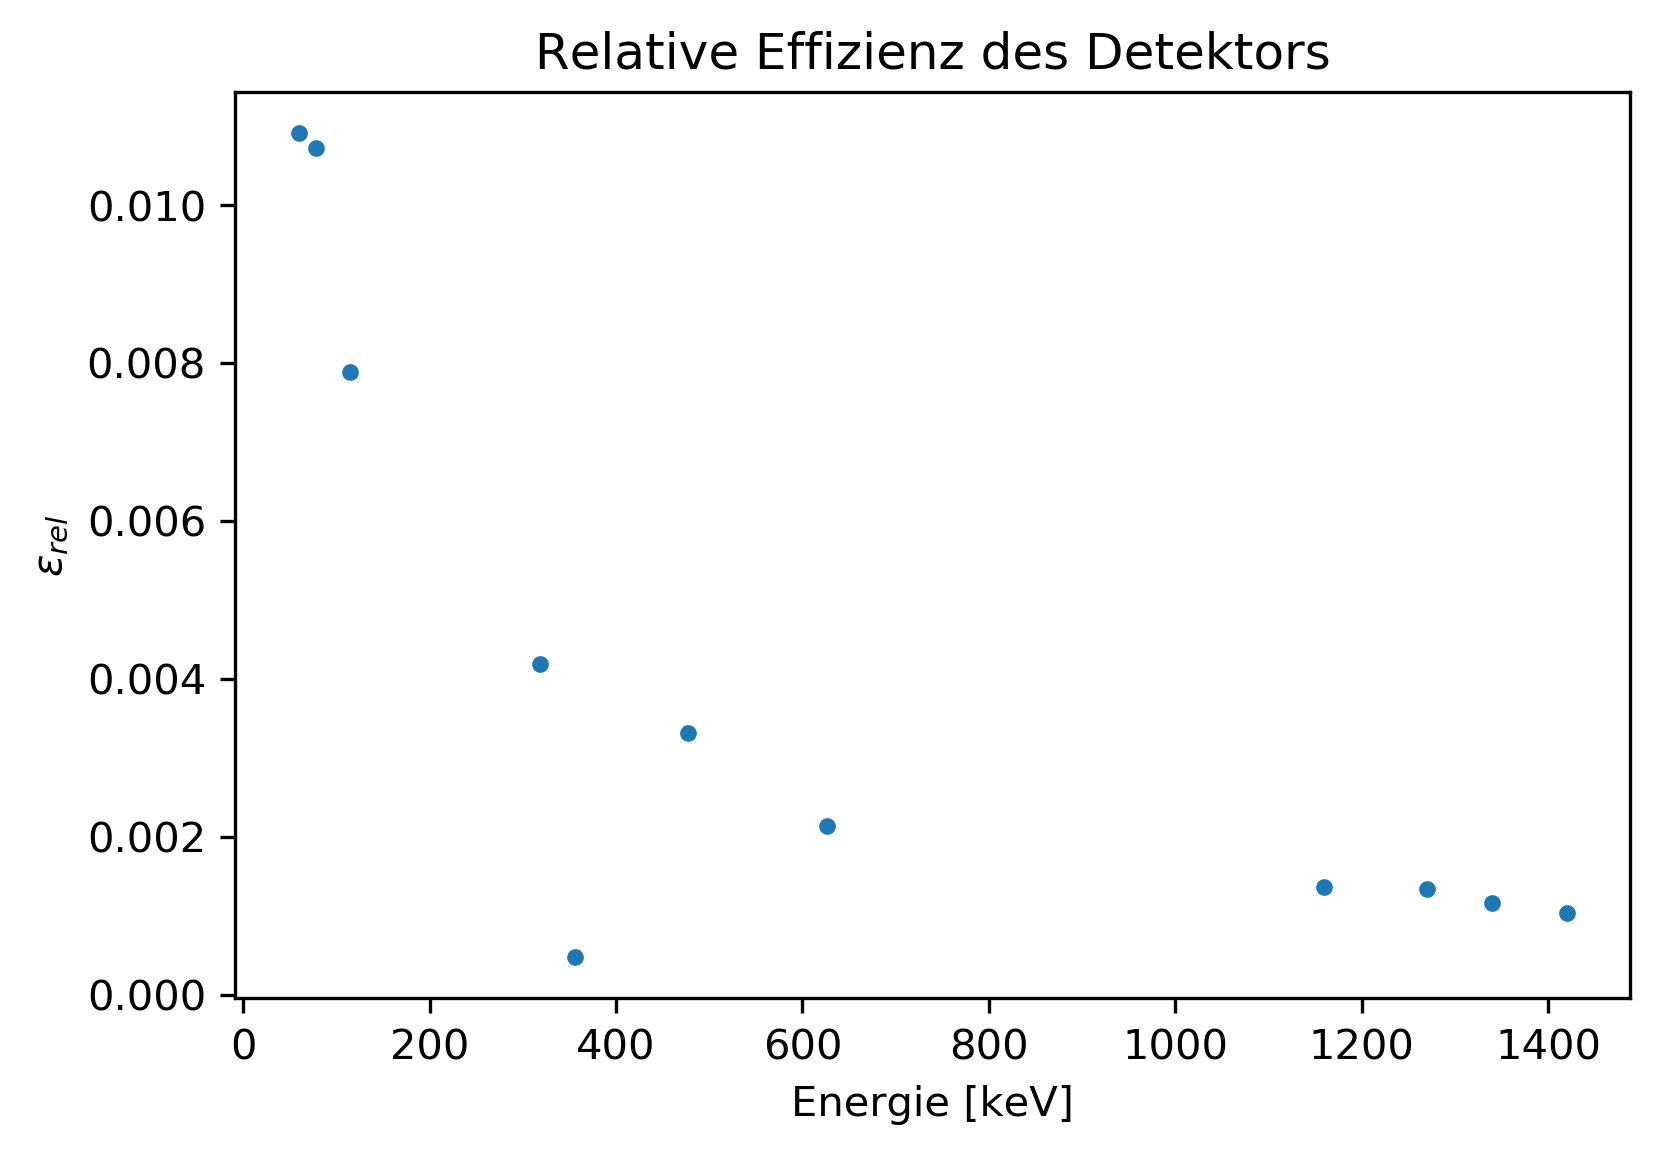

In [159]:
fig,ax=plt.subplots(dpi=300)
ax.plot(peaklist,epsilon,".")
print(epsilon)
ax.set_xlabel("Energie [keV]")
ax.set_ylabel("$\epsilon_{rel}$")
ax.set_title("Relative Effizienz des Detektors")
fig.savefig("Plots/relintens.png")

[0.0033062330623306233, 0.0013414634146341464, 0.0013580246913580246, 0.0011604938271604938, 0.0021376176787814604, 0.010716588900269339, 0.000475010019742604, 0.0078850152487855, 0.0041818942162584775, 0.0010264649439907173, 0.010903290012879053]


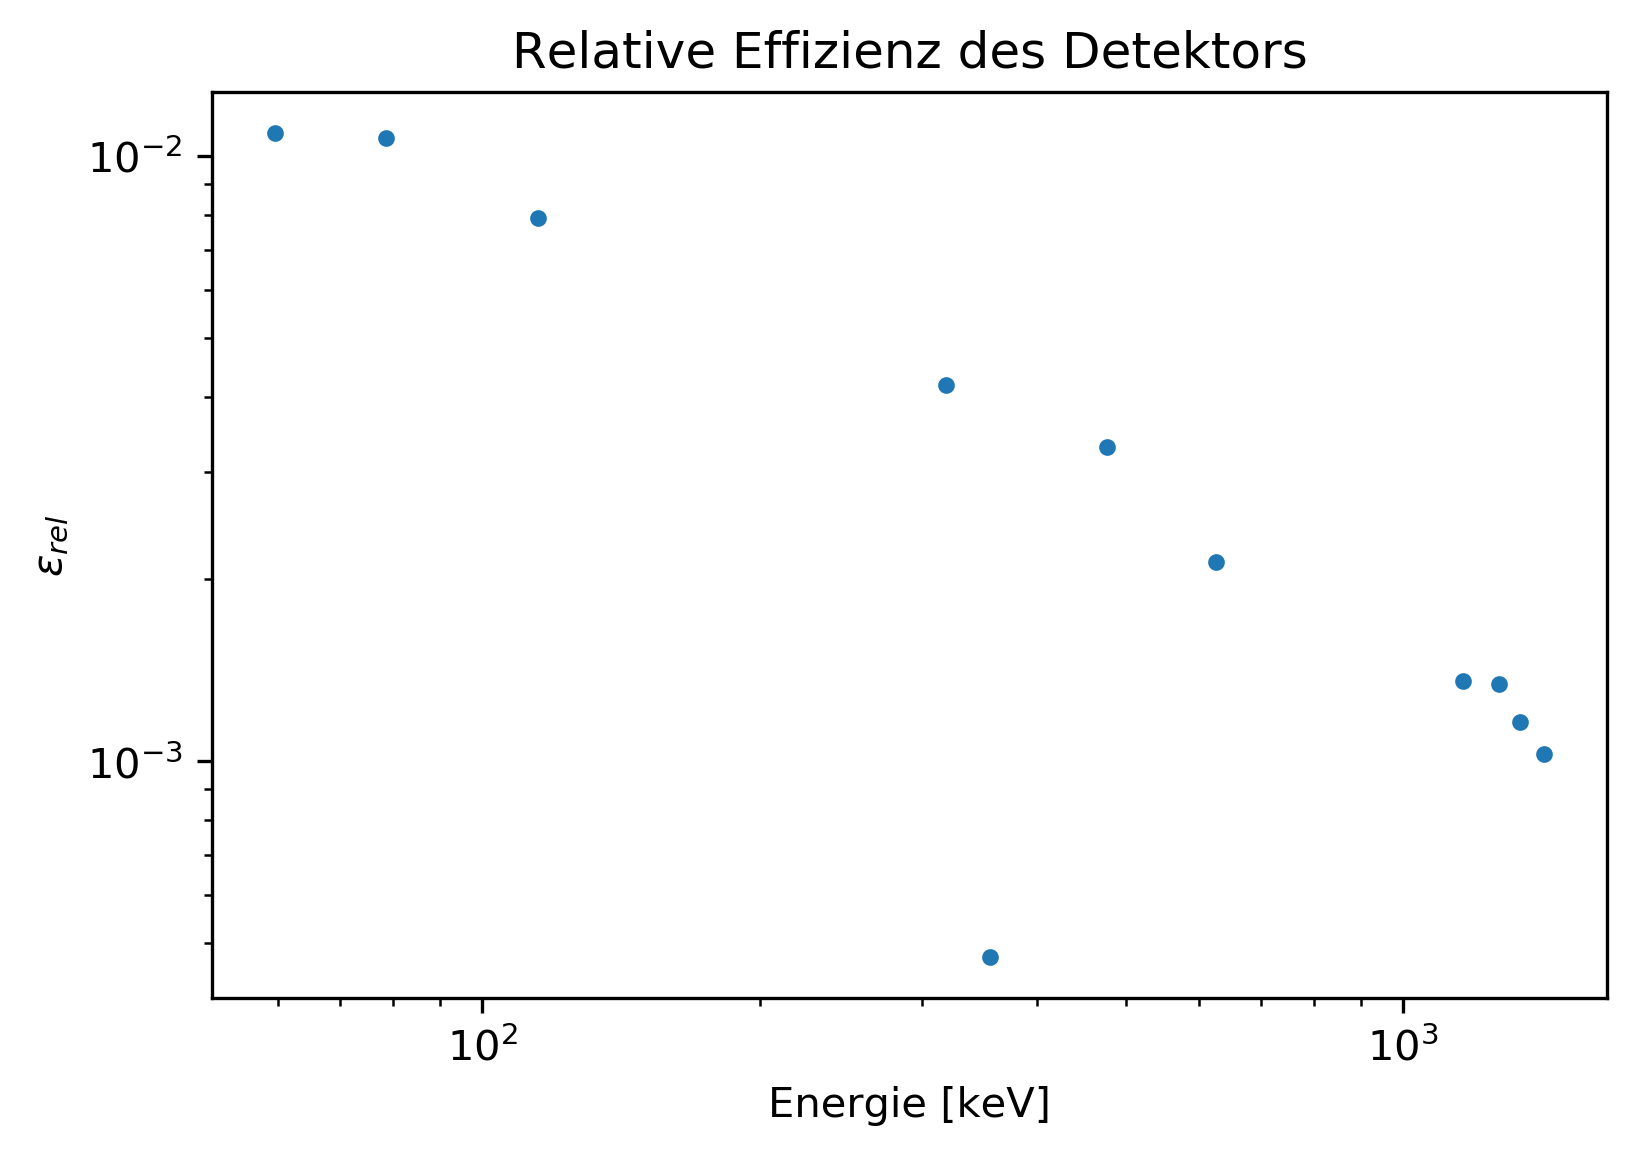

In [160]:
fig,ax=plt.subplots(dpi=300)
ax.plot(peaklist,epsilon,".")
print(epsilon)
ax.set_xlabel("Energie [keV]")
ax.set_ylabel("$\epsilon_{rel}$")
ax.set_title("Relative Effizienz des Detektors")
ax.loglog()
fig.savefig("Plots/relintenslog.png")


In [161]:
25200/3.82e+05 

0.06596858638743455

In [162]:
25200**0.5/3.82e+05 

0.00041556303315150637

In [164]:
Energie=np.array([477,1270,1160,1340,626,78.5,356,115,319,1420,59.6])
dEnergie=np.array([4.87,2.44,14.7,15.7,142,283,35.8,76.1,58.6,20.3,983])
sigma=np.array([9.02,8.87,8.86,8.89,8.69,8.85,8.62,8.57,8.61,8.94,7.05])

In [165]:
auflosung=dEnergie/Energie

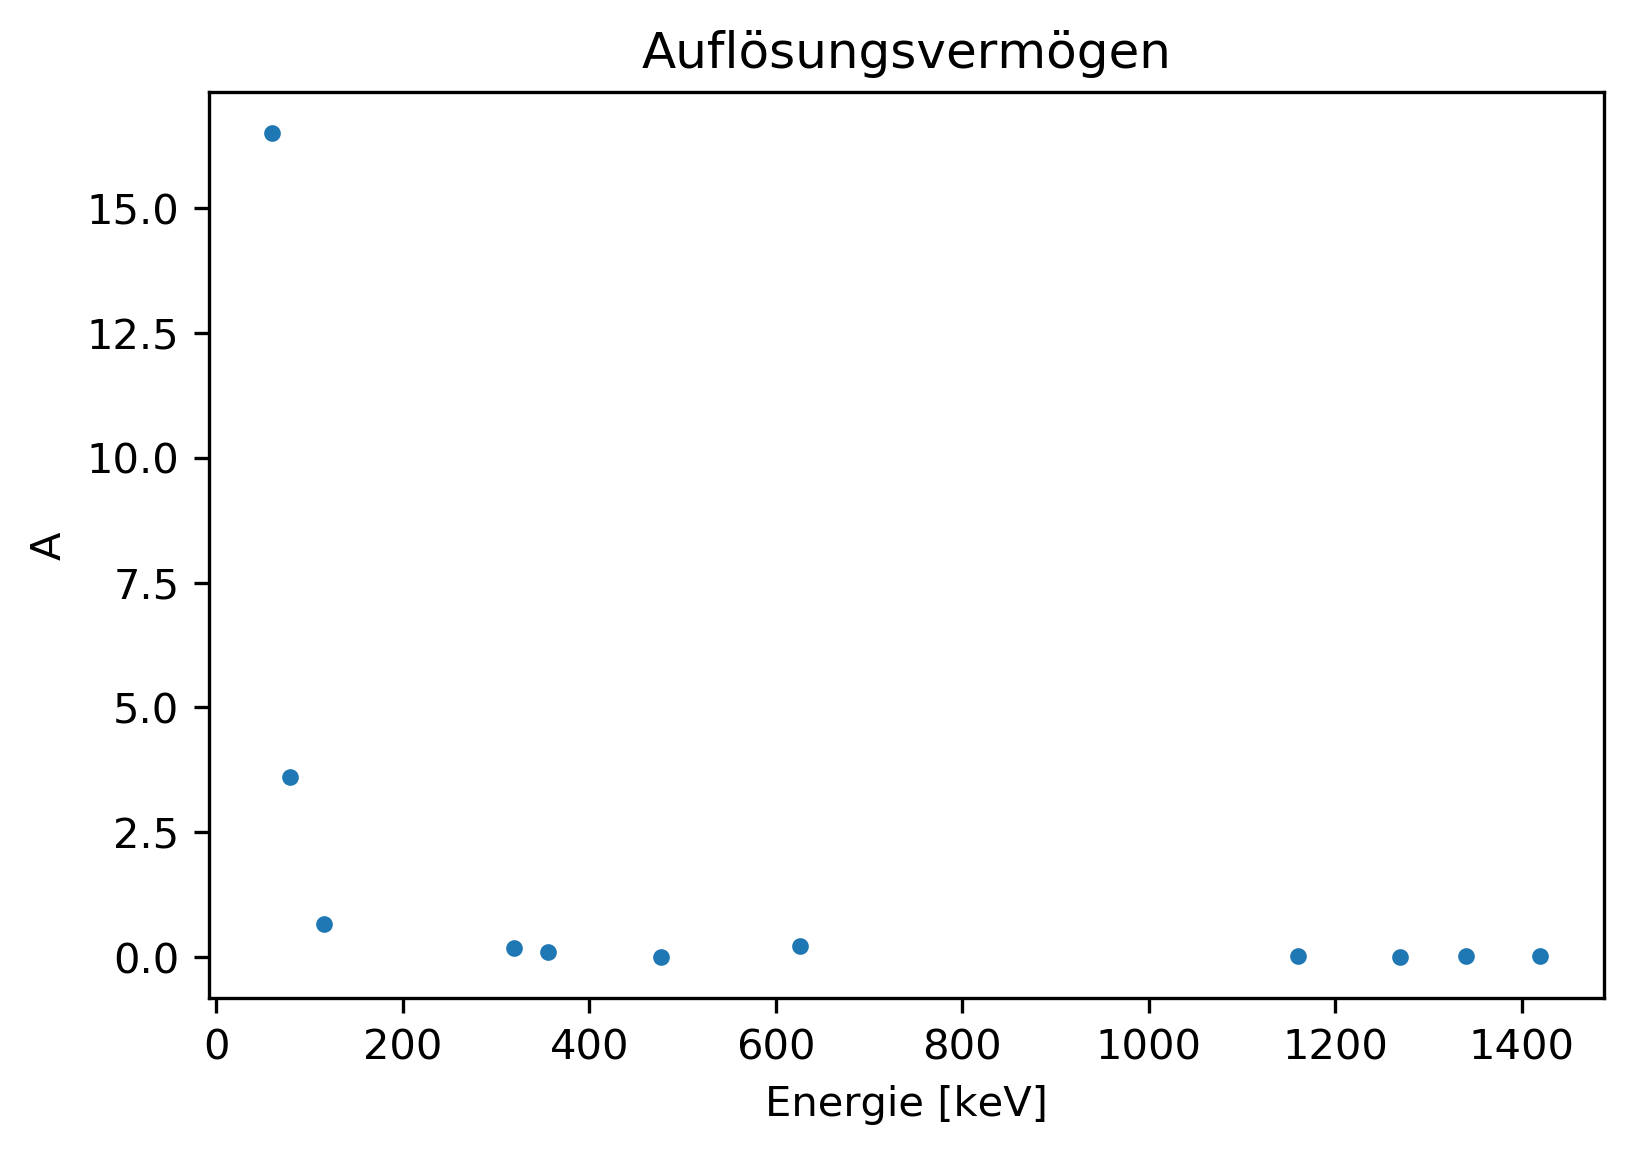

In [177]:
fig,ax=plt.subplots(dpi=300)
ax.plot(Energie,auflosung,".")
ax.set_ylabel("A")
ax.set_xlabel("Energie [keV]")
ax.set_title("Auflösungsvermögen")
fig.savefig("Auflosungsvermogen.png")

In [178]:
print(auflosung)

[1.02096436e-02 1.92125984e-03 1.26724138e-02 1.17164179e-02
 2.26837061e-01 3.60509554e+00 1.00561798e-01 6.61739130e-01
 1.83699060e-01 1.42957746e-02 1.64932886e+01]


In [179]:
print(Energie)

[ 477.  1270.  1160.  1340.   626.    78.5  356.   115.   319.  1420.
   59.6]


In [180]:
 3.54e-01/1.42957746e-02

24.76256165930316

In [181]:
from tex import get_table

In [182]:
names=["Energie [keV]","Auflösungsvermögen"]
get_table(names,[Energie,auflosung])

\begin{table}[H]
\centering
\begin{tabular}{|c|c|}
\hline
Energie [keV] & Auflösungsvermögen \\ \hline\hline
477.0 & 0.010209643605870022 \\ \hline
1270.0 & 0.001921259842519685 \\ \hline
1160.0 & 0.012672413793103448 \\ \hline
1340.0 & 0.01171641791044776 \\ \hline
626.0 & 0.2268370607028754 \\ \hline
78.5 & 3.605095541401274 \\ \hline
356.0 & 0.10056179775280898 \\ \hline
115.0 & 0.6617391304347826 \\ \hline
319.0 & 0.18369905956112853 \\ \hline
1420.0 & 0.014295774647887324 \\ \hline
59.6 & 16.493288590604028 \\ \hline
\hline
\end{tabular}
\caption{\label{}}
\end{table}
